In [26]:
import numpy as np
import mlrose_hiive as mlrose
import random
import time
import matplotlib.pyplot as plt


In [27]:
def knapsack_generator(length):
    values = []
    weights = []
    for i in range(length):
        values = random.sample(range(1, length+1), length)
        weights = random.sample(range(1, length+1), length)
    return values, weights

def fit_iteration_test(problem, algorithm, args, plot=False, alg_name="", prob_name=""):
    return algorithm(**args)
    

def time_iteration_test(iter_range, problem, algorithm, args, plot=False, alg_name="", prob_name=""):
    times = []
    for max_iters in iter_range:
        start_time = time.time()
        args['max_iters'] = max_iters
        args['max_attempts'] = max_iters
        state, fitness, curve = algorithm(**args)
        time_elapsed = time.time() - start_time
        times.append(time_elapsed)
    if plot:
        plt.plot(param_range, fits, label=alg_name)
        plt.xlabel (param_name)
        plt.ylabel ('fit')
        plt.legend()
        title = "" + alg_name + " " + param_name + " fits " + prob_name
        plt.title (title)
        plt.show()
    return times

def test_param(param_name, param_range, problem, algorithm, args, plot=False, alg_name="", prob_name=""):
    fits = []
    best_fit = 0
    best_arg_val = 0
    if param_name == 'decay':
        #this is SA, we need to define schedule
        for p in param_range:
            print(p)
            args['schedule'] = mlrose.GeomDecay(init_temp=10, decay=p, min_temp=0.001)
            state, fitness, curve = algorithm(**args)
            fits.append(fitness)
            if fitness > best_fit:
                best_fit = fitness
                best_arg_val = p
    else:
        for p in param_range:
            args[param_name] = p
            state, fitness, curve = algorithm(**args)
            fits.append(fitness)
            if fitness > best_fit:
                best_fit = fitness
                best_arg_val = p
    print("best value for ", param_name, ": ", best_arg_val)
    print("best fit: ", best_fit)
    if plot:
        plt.plot(param_range, fits, label=alg_name)
        plt.xlabel (param_name)
        plt.ylabel ('fit')
        plt.legend()
        title = "" + alg_name + " " + param_name + " fits " + prob_name
        plt.title (title)
        plt.show()
    return best_arg_val, best_fit
    
    
r_hill_args = {
    'problem': problem,
    'curve': True,
    'random_state': 13,
    'max_attempts':10,
    'max_iters':10000, 
    'restarts':20,
    
}
ga_args = {
    'problem': problem,
    'curve': True,
    'random_state': 13,
    'pop_size': 200,
    'mutation_prob': 0.5,
    'max_attempts': 10,
    'max_iters': 10000,
    
}
sa_args = {
    'problem': problem,
    'curve': True,
    'random_state': 13,
    'schedule': mlrose.GeomDecay(init_temp=10, decay=0.99, min_temp=0.001),
    'max_attempts': 10,
    'max_iters': 10000  
}
mimic_args = {
    'problem': problem,
    'curve': True,
    'random_state': 13,
    'pop_size': 100,
    'keep_pct': 0.3,
    'max_attempts': 10,
    'max_iters': 10000,
}

times_per_iterations = {
    'OneMax':{
        'r_hill': [],
        'SA': [],
        'GA': [],
        'MIMIC': []
    },
    'FourPeaks':{
        'r_hill': [],
        'SA': [],
        'GA': [],
        'MIMIC': []
    },
    'Knapsack':{
        'r_hill': [],
        'SA': [],
        'GA': [],
        'MIMIC': []
    },
}
fit_per_iterations = {
    'OneMax':{
        'r_hill': [],
        'SA': [],
        'GA': [],
        'MIMIC': []
    },
    'FourPeaks':{
        'r_hill': [],
        'SA': [],
        'GA': [],
        'MIMIC': []
    },
    'Knapsack':{
        'r_hill': [],
        'SA': [],
        'GA': [],
        'MIMIC': []
    }
}

# OneMax

best value for  restarts :  256
best fit:  49.0


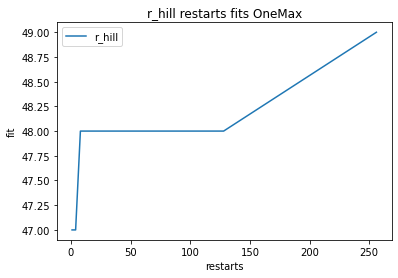

best value for  max_iters :  128
best fit:  49.0


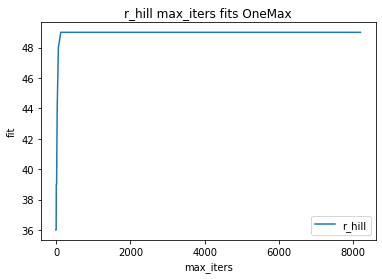

0.85
0.9
0.95
0.99
0.999
best value for  decay :  0.85
best fit:  46.0


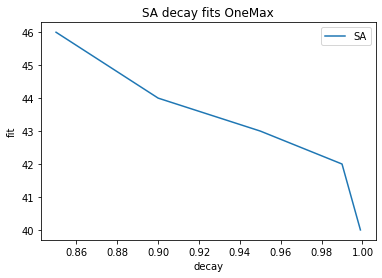

best value for  max_iters :  4096
best fit:  40.0


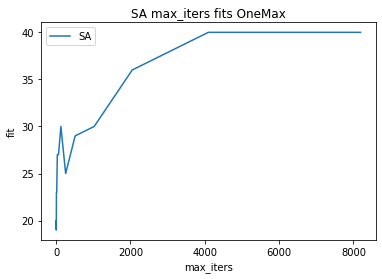

best value for  max_iters :  32
best fit:  50.0


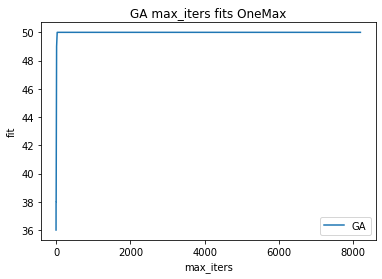

best value for  pop_size :  256
best fit:  50.0


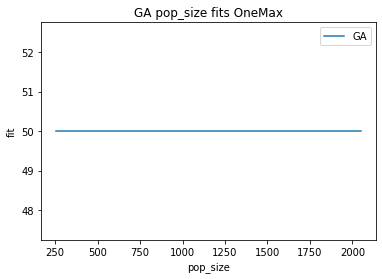

best value for  mutation_prob :  0.1
best fit:  50.0


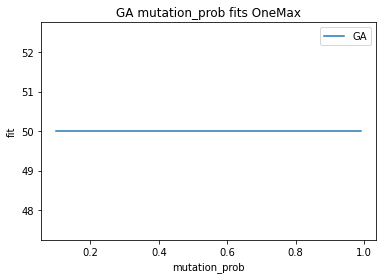

best value for  keep_pct :  0.7
best fit:  50.0


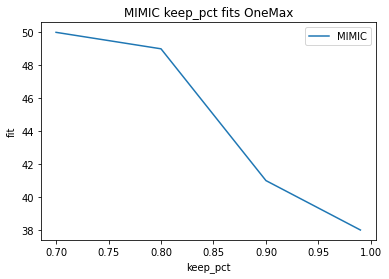

best value for  max_iters :  32
best fit:  50.0


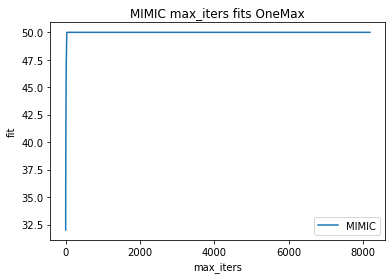

In [28]:
length = 50
fitness_fn = mlrose.OneMax()
problem = mlrose.DiscreteOpt(length=length, 
                             fitness_fn=fitness_fn
                            )


best_r_hill_fit = 0
best_SA_fit = 0
best_GA_fit = 0
best_MIMIC_fit = 0

#r_hill
restart_range = [1, 2, 4, 8, 16, 32, 64, 128, 256]
arg_val, best_fit = test_param('restarts', restart_range, problem, mlrose.random_hill_climb, r_hill_args, plot=True, alg_name="r_hill", prob_name="OneMax")

r_hill_args['restarts'] = arg_val

max_iter_range = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]
arg_val, best_fit = test_param('max_iters', max_iter_range, problem, mlrose.random_hill_climb, r_hill_args, plot=True, alg_name="r_hill", prob_name="OneMax")

r_hill_args['max_iters'] = arg_val
best_r_hill_fit = best_fit

#Simulated annealing
decay_range = [0.85, 0.9, 0.95, 0.99, 0.999]
arg_val, best_fit = test_param('decay', decay_range, problem, mlrose.simulated_annealing, sa_args, plot=True, alg_name="SA", prob_name="OneMax")

#its hard to dynamicall set this so i played around with decay manually and set it to optimal initially

max_iter_range = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]
arg_val, best_fit = test_param('max_iters', max_iter_range, problem, mlrose.simulated_annealing, sa_args, plot=True, alg_name="SA", prob_name="OneMax")

sa_args['max_iters'] = arg_val
best_SA_fit = best_fit
# genetic algorithm

max_iter_range = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]
arg_val, best_fit = test_param('max_iters', max_iter_range, problem, mlrose.genetic_alg, ga_args, plot=True, alg_name="GA", prob_name="OneMax")

ga_args['max_iters'] = arg_val

pop_size_range = [256, 512, 1024, 2048]
arg_val, best_fit = test_param('pop_size', pop_size_range, problem, mlrose.genetic_alg, ga_args, plot=True, alg_name="GA", prob_name="OneMax")

ga_args['pop_size'] = arg_val

#mutation_prob_range = np.arange(0.6, 0.9, 0.001)
mutation_prob_range = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]
arg_val, best_fit = test_param('mutation_prob', mutation_prob_range, problem, mlrose.genetic_alg, ga_args, plot=True, alg_name="GA", prob_name="OneMax")

ga_args['mutation_prob'] = arg_val
best_GA_fit = best_fit
#MIMIC

#pop_size_range = [256, 512, 1024, 2048]
#arg_val, best_fit = test_param('pop_size', pop_size_range, problem, mlrose.mimic ,mimic_args, plot=True, alg_name="MIMIC", prob_name="OneMax")

keep_pct = [0.7, 0.8, 0.9, 0.99]
arg_val, best_fit = test_param('keep_pct', keep_pct, problem, mlrose.mimic, mimic_args, plot=True, alg_name="MIMIC", prob_name="OneMax")

mimic_args['keep_pct'] = arg_val

max_iter_range = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]
arg_val, best_fit = test_param('max_iters', max_iter_range, problem, mlrose.mimic, mimic_args, plot=True, alg_name="MIMIC", prob_name="OneMax")

mimic_args['max_iters'] = arg_val
best_MIMIC_fit = best_fit

## timer

In [ ]:
length = 50
fitness_fn = mlrose.OneMax()
problem = mlrose.DiscreteOpt(length=length, 
                             fitness_fn=fitness_fn
                            )

max_iter_range = [1, 2, 4, 8, 16, 32, 64]#, 128, 256, 512, 1024, 2048, 4096, 8192]
times = time_iteration_test(max_iter_range, problem, mlrose.random_hill_climb, r_hill_args, plot=False, alg_name="r_hill", prob_name="OneMax")
times_per_iterations['OneMax']['r_hill'] = times
times = time_iteration_test(max_iter_range, problem, mlrose.simulated_annealing, sa_args, plot=False, alg_name="SA", prob_name="OneMax")
times_per_iterations['OneMax']['SA'] = times
times = time_iteration_test(max_iter_range, problem, mlrose.genetic_alg, ga_args, plot=False, alg_name="GA", prob_name="OneMax")
times_per_iterations['OneMax']['GA'] = times
times = time_iteration_test(max_iter_range, problem, mlrose.mimic, mimic_args, plot=False, alg_name="MIMIC", prob_name="OneMax")
times_per_iterations['OneMax']['MIMIC'] = times



In [ ]:
state, fitness, curve = fit_iteration_test(problem, mlrose.random_hill_climb, r_hill_args, plot=False, alg_name="r_hill", prob_name="OneMax")
fit_per_iterations['OneMax']['r_hill'] = curve
state, fitness, curve = fit_iteration_test(problem, mlrose.simulated_annealing, sa_args, plot=False, alg_name="SA", prob_name="OneMax")
fit_per_iterations['OneMax']['SA'] = curve
state, fitness, curve = fit_iteration_test(problem, mlrose.genetic_alg, ga_args, plot=False, alg_name="GA", prob_name="OneMax")
fit_per_iterations['OneMax']['GA'] = curve    
state, fitness, curve = fit_iteration_test(problem, mlrose.mimic, mimic_args, plot=False, alg_name="MIMIC", prob_name="OneMax")
fit_per_iterations['OneMax']['MIMIC'] = curve

# Four Peaks

In [ ]:
length = 64
fitness_fn = mlrose.FourPeaks()#t_pct=0.10
problem = mlrose.DiscreteOpt(length=length, 
                             fitness_fn=fitness_fn, 
                             maximize=True
                            )
best_r_hill_fit = 0
best_SA_fit = 0
best_GA_fit = 0
best_MIMIC_fit = 0

#r_hill
restart_range = [1, 2, 4, 8, 16, 32, 64, 128, 256]
arg_val, best_fit = test_param('restarts', restart_range, problem, mlrose.random_hill_climb, r_hill_args, plot=True, alg_name="r_hill", prob_name="four_peaks")

r_hill_args['restarts'] = arg_val

max_iter_range = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]
arg_val, best_fit = test_param('max_iters', max_iter_range, problem, mlrose.random_hill_climb, r_hill_args, plot=True, alg_name="r_hill", prob_name="four_peaks")

r_hill_args['max_iters'] = arg_val
best_r_hill_fit = best_fit

#Simulated annealing
decay_range = [0.85, 0.9, 0.95, 0.99, 0.999]
arg_val, best_fit = test_param('decay', decay_range, problem, mlrose.simulated_annealing, sa_args, plot=True, alg_name="SA", prob_name="four_peaks")

#its hard to dynamicall set this so i played around with decay manually and set it to optimal initially

max_iter_range = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]
arg_val, best_fit = test_param('max_iters', max_iter_range, problem, mlrose.simulated_annealing, sa_args, plot=True, alg_name="SA", prob_name="four_peaks")

sa_args['max_iters'] = arg_val
best_SA_fit = best_fit
# genetic algorithm

max_iter_range = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]
arg_val, best_fit = test_param('max_iters', max_iter_range, problem, mlrose.genetic_alg, ga_args, plot=True, alg_name="GA", prob_name="four_peaks")

ga_args['max_iters'] = arg_val

pop_size_range = [256, 512, 1024, 2048]
arg_val, best_fit = test_param('pop_size', pop_size_range, problem, mlrose.genetic_alg, ga_args, plot=True, alg_name="GA", prob_name="four_peaks")

ga_args['pop_size'] = arg_val

#mutation_prob_range = np.arange(0.6, 0.9, 0.001)
mutation_prob_range = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]
arg_val, best_fit = test_param('mutation_prob', mutation_prob_range, problem, mlrose.genetic_alg, ga_args, plot=True, alg_name="GA", prob_name="four_peaks")

ga_args['mutation_prob'] = arg_val
best_GA_fit = best_fit
#MIMIC

#pop_size_range = [256, 512, 1024, 2048]
#arg_val, best_fit = test_param('pop_size', pop_size_range, problem, mlrose.mimic ,mimic_args, plot=True, alg_name="MIMIC", prob_name="knapsack")

keep_pct = [0.7, 0.8, 0.9, 0.99]
arg_val, best_fit = test_param('keep_pct', keep_pct, problem, mlrose.mimic, mimic_args, plot=True, alg_name="MIMIC", prob_name="four_peaks")

mimic_args['keep_pct'] = arg_val

max_iter_range = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]
arg_val, best_fit = test_param('max_iters', max_iter_range, problem, mlrose.mimic, mimic_args, plot=True, alg_name="MIMIC", prob_name="four_peaks")

mimic_args['max_iters'] = arg_val
best_MIMIC_fit = best_fit

In [ ]:
length = 64
fitness_fn = mlrose.FourPeaks()#t_pct=0.10
problem = mlrose.DiscreteOpt(length=length, 
                             fitness_fn=fitness_fn, 
                            )


max_iter_range = [1, 2, 4, 8, 16, 32, 64]#, 128, 256, 512, 1024, 2048, 4096, 8192]
times = time_iteration_test(max_iter_range, problem, mlrose.random_hill_climb, r_hill_args, plot=False, alg_name="r_hill", prob_name='FourPeaks')
times_per_iterations['FourPeaks']['r_hill'] = times
times = time_iteration_test(max_iter_range, problem, mlrose.simulated_annealing, sa_args, plot=False, alg_name="SA", prob_name='FourPeaks')
times_per_iterations['FourPeaks']['SA'] = times
times = time_iteration_test(max_iter_range, problem, mlrose.genetic_alg, ga_args, plot=False, alg_name="GA", prob_name='FourPeaks')
times_per_iterations['FourPeaks']['GA'] = times
times = time_iteration_test(max_iter_range, problem, mlrose.mimic, mimic_args, plot=False, alg_name="MIMIC", prob_name='FourPeaks')
times_per_iterations['FourPeaks']['MIMIC'] = times

In [ ]:
state, fitness, curve = fit_iteration_test(problem, mlrose.random_hill_climb, r_hill_args, plot=False, alg_name="r_hill", prob_name='FourPeaks')
fit_per_iterations['FourPeaks']['r_hill'] = curve
state, fitness, curve = fit_iteration_test(problem, mlrose.simulated_annealing, sa_args, plot=False, alg_name="SA", prob_name='FourPeaks')
fit_per_iterations['FourPeaks']['SA'] = curve
state, fitness, curve = fit_iteration_test(problem, mlrose.genetic_alg, ga_args, plot=False, alg_name="GA", prob_name='FourPeaks')
fit_per_iterations['FourPeaks']['GA'] = curve    
state, fitness, curve = fit_iteration_test(problem, mlrose.mimic, mimic_args, plot=False, alg_name="MIMIC", prob_name='FourPeaks')
fit_per_iterations['FourPeaks']['MIMIC'] = curve

# Knapsack

In [ ]:
length = 64
values, weights = knapsack_generator(length)
max_weight_pct = 0.6
fitness_fn = mlrose.Knapsack(weights, values, max_weight_pct)
problem = mlrose.DiscreteOpt(length=len(weights), 
                             fitness_fn=fitness_fn
                            )

best_r_hill_fit = 0
best_SA_fit = 0
best_GA_fit = 0
best_MIMIC_fit = 0

#r_hill
restart_range = [1, 2, 4, 8, 16, 32, 64, 128, 256]
arg_val, best_fit = test_param('restarts', restart_range, problem, mlrose.random_hill_climb, r_hill_args, plot=True, alg_name="r_hill", prob_name="knapsack")

r_hill_args['restarts'] = arg_val

max_iter_range = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]
arg_val, best_fit = test_param('max_iters', max_iter_range, problem, mlrose.random_hill_climb, r_hill_args, plot=True, alg_name="r_hill", prob_name="knapsack")

r_hill_args['max_iters'] = arg_val
best_r_hill_fit = best_fit

#Simulated annealing
decay_range = [0.85, 0.9, 0.95, 0.99, 0.999]
arg_val, best_fit = test_param('decay', decay_range, problem, mlrose.simulated_annealing, sa_args, plot=True, alg_name="SA", prob_name="knapsack")

#its hard to dynamicall set this so i played around with decay manually and set it to optimal initially

max_iter_range = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]
arg_val, best_fit = test_param('max_iters', max_iter_range, problem, mlrose.simulated_annealing, sa_args, plot=True, alg_name="SA", prob_name="knapsack")

sa_args['max_iters'] = arg_val
best_SA_fit = best_fit
# genetic algorithm

max_iter_range = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]
arg_val, best_fit = test_param('max_iters', max_iter_range, problem, mlrose.genetic_alg, ga_args, plot=True, alg_name="GA", prob_name="knapsack")

ga_args['max_iters'] = arg_val

pop_size_range = [256, 512, 1024, 2048]
arg_val, best_fit = test_param('pop_size', pop_size_range, problem, mlrose.genetic_alg, ga_args, plot=True, alg_name="GA", prob_name="knapsack")

ga_args['pop_size'] = arg_val

#mutation_prob_range = np.arange(0.6, 0.9, 0.001)
mutation_prob_range = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]
arg_val, best_fit = test_param('mutation_prob', mutation_prob_range, problem, mlrose.genetic_alg, ga_args, plot=True, alg_name="GA", prob_name="knapsack")

ga_args['mutation_prob'] = arg_val
best_GA_fit = best_fit
#MIMIC

#pop_size_range = [256, 512, 1024, 2048]
#arg_val, best_fit = test_param('pop_size', pop_size_range, problem, mlrose.mimic ,mimic_args, plot=True, alg_name="MIMIC", prob_name="knapsack")

keep_pct = [0.7, 0.8, 0.9, 0.99]
arg_val, best_fit = test_param('keep_pct', keep_pct, problem, mlrose.mimic, mimic_args, plot=True, alg_name="MIMIC", prob_name="knapsack")

mimic_args['keep_pct'] = arg_val

max_iter_range = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]
arg_val, best_fit = test_param('max_iters', max_iter_range, problem, mlrose.mimic, mimic_args, plot=True, alg_name="MIMIC", prob_name="knapsack")

mimic_args['max_iters'] = arg_val
best_MIMIC_fit = best_fit

In [ ]:
length = 64
values, weights = knapsack_generator(length)
max_weight_pct = 0.6
fitness_fn = mlrose.Knapsack(weights, values, max_weight_pct)
problem = mlrose.DiscreteOpt(length=len(weights), 
                             fitness_fn=fitness_fn
                            )

max_iter_range = [1, 2, 4, 8, 16, 32, 64]#, 128, 256, 512, 1024, 2048, 4096, 8192]
times = time_iteration_test(max_iter_range, problem, mlrose.random_hill_climb, r_hill_args, plot=False, alg_name="r_hill", prob_name='Knapsack')
times_per_iterations['Knapsack']['r_hill'] = times
times = time_iteration_test(max_iter_range, problem, mlrose.simulated_annealing, sa_args, plot=False, alg_name="SA", prob_name='Knapsack')
times_per_iterations['Knapsack']['SA'] = times
times = time_iteration_test(max_iter_range, problem, mlrose.genetic_alg, ga_args, plot=False, alg_name="GA", prob_name='Knapsack')
times_per_iterations['Knapsack']['GA'] = times
times = time_iteration_test(max_iter_range, problem, mlrose.mimic, mimic_args, plot=False, alg_name="MIMIC", prob_name='Knapsack')
times_per_iterations['Knapsack']['MIMIC'] = times

In [ ]:
state, fitness, curve = fit_iteration_test(problem, mlrose.random_hill_climb, r_hill_args, plot=False, alg_name="r_hill", prob_name='Knapsack')
fit_per_iterations['Knapsack']['r_hill'] = curve
state, fitness, curve = fit_iteration_test(problem, mlrose.simulated_annealing, sa_args, plot=False, alg_name="SA", prob_name='Knapsack')
fit_per_iterations['Knapsack']['SA'] = curve
state, fitness, curve = fit_iteration_test(problem, mlrose.genetic_alg, ga_args, plot=False, alg_name="GA", prob_name='Knapsack')
fit_per_iterations['Knapsack']['GA'] = curve    
state, fitness, curve = fit_iteration_test(problem, mlrose.mimic, mimic_args, plot=False, alg_name="MIMIC", prob_name='Knapsack')
fit_per_iterations['Knapsack']['MIMIC'] = curve

# Analysis

In [ ]:
iters = range(1, 10000, 1)

plt.plot(times_per_iterations['Knapsack']['r_hill'],iters, label="r_hill")
plt.plot(times_per_iterations['Knapsack']['SA'],iters, label="SA")
plt.plot(times_per_iterations['Knapsack']['GA'],iters, label="GA")
plt.plot(times_per_iterations['Knapsack']['MIMIC'],iters, label="MIMIC")
plt.xlabel ('Iterations')
plt.ylabel ('Time/Sec')
plt.legend()
plt.title ('Knapsack time/num iterations')
plt.show()

In [ ]:
plt.plot(fit_per_iterations['Knapsack']['r_hill'],iters, label="r_hill")
plt.plot(fit_per_iterations['Knapsack']['SA'],iters, label="SA")
plt.plot(fit_per_iterations['Knapsack']['GA'],iters, label="GA")
plt.plot(fit_per_iterations['Knapsack']['MIMIC'],iters, label="MIMIC")
plt.xlabel ('Iterations')
plt.ylabel ('fit')
plt.legend()
plt.title ('Knapsack fit/num iterations')
plt.show()